# GENERATION OF 2 DIMENSIONAL KLEINBERG MODEL

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

Our task is to simulate a small world network, the probability matrix is defined as follows
\begin{equation}
P(u,v)={\text{dist}(u,v)^{-r}\over Z} \qquad Z=\sum_{y\neq u}\text{dist}(u,y)^{-r}
\end{equation}
This graph is therefore represented by two number $G(N,r)$ and it has a geometric structur of a torus $T=\{1,\dots,N\}^2$.

The distance is defined as follow, with this notation of the vertices $u=(u_1,u_2)\in \{1,\dots,N\}^2$
\begin{equation}
	\text{dist}(u,v)=d_N(|u_1-v_1|)+d_N(|u_2-v_2|)
\end{equation}
and $d_N$ is the one dimensional distance over a circular graph
\begin{equation}
	d_N(i)=\begin{cases}i \quad 0\leq i<N/2\\
	N-i\quad N/2\leq i\leq N
	\end{cases}
\end{equation}
We have to start from a periodic 2d lattice

In [2]:
# 2d lattice graph, periodic
L = 15 # the total number of vertices will be L*L
G = nx.grid_2d_graph(L,L, periodic=True)

**Definition of the distance function**

In [3]:
def dist_1d(a, b, L):
    '''
    Distance between two points on a periodic 
    line with length L.
    
    Arguments:
    - a: first point (integer 0,..,L-1)
    - b: second point (integer 0,...,L-1)
    - L: number of points on line
    
    Return:
    - d: distance between points
    '''
    # handle usage of bad arguments
    if a>=L or b>=L or a<0 or b<0:
        print('INFO: \na={} or b={} should be in range [0,L-1]=[0,{}]. Using a%L={} or b%L={} instead.\n'.format(a, b, L, a%L, b%L))
        a = a%L
        b = b%L
    if type(a) != int or type(b) != int or type(L) != int:
        print('INFO: \nAll arguments should be type int. You used type(a)={}, type(b)={}, type(L)={}. \nWill be converted using int(..).\n'.format(type(a), type(b), type(L)))
        a, b, L = int(a), int(b), int(L)
        
    # return distance
    d = 0
    if abs(a-b)<L/2.:
        d = abs(a-b)
    else :
        d = L-abs(a-b)
    return d


def dist_2d_lattice(u, v, L):
    '''
    Distance between two node on a periodic 
    lattice graph with side length L.
    
    Arguments:
    - u: first node (tuple (u_0, u_1))
    - v: second node (tuple (v_0, v_1))
    - L: side length of lattice
    
    Return:
    - d: distance between points (-1 if error occured)
    '''
    # handle arguments having wrong types
    if type(u)!=tuple or type(v)!= tuple:
        print('ERROR: \nArguments u and v should be type tuple. You used type(u)={}, type(v)={}. \nBreak and return -1\n'.format(type(u), type(v)))
        return -1
    if type(L)!=int:
        print('INFO: \nArgument L should be type int. You used type(L)={}. Now using int(L)={}\n'.format(type(L), int(L)))
        L=int(L)
    
    d = dist_1d(u[0], v[0], L) + dist_1d(u[1], v[1], L)
    return d

**Creation of the Kleinberg 2D graph**

Firstly we compute the normalization factor Z, we note that Z doesn't depend on the choice of the vertex u, then in this computation I choose the (0,0) as starting vertex.

I introdue here also the parameter $r$

In [4]:
Z=0
r=2 # for example r=2
for y in G:
    if y!=(0,0):
        Z=Z+dist_2d_lattice((0,0),y,L)**(-r)
print(Z)

11.588535047388682


Now i will randomly add edges using the probability defined initially

523
Everything ok 25200


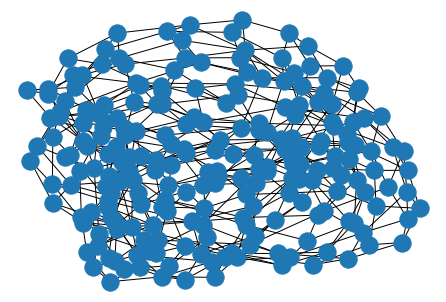

In [5]:
count=0 # to see if at the end I attempted N(N-1)/2 edges, where N=L*L
for x in G:
    for y in G:
        if x>y: #to avoid self loop and also double count on the edges
            count=count+1
            if random.uniform(0, 1)<(dist_2d_lattice(x,y,L)**(-r)/Z):
                G.add_edge(x,y)   
print(G.number_of_edges())
if count == L*L*(L*L-1)/2:
    print('Everything ok', count)

nx.draw(G)

# FINAL RESULT

In [6]:
def Kleinberg_2d(L,r):
    G = nx.grid_2d_graph(L,L, periodic=True)
    Z=0
    for y in G:
        if y!=(0,0):
            Z=Z+dist_2d_lattice((0,0),y,L)**(-r)
    for x in G:
        for y in G:
            if x>y: #to avoid self loop and also double count on the edges
                if random.uniform(0, 1)<(dist_2d_lattice(x,y,L)**(-r)/Z):
                    G.add_edge(x,y) 
    return G

***Viasualization and manipulation on a lattice***

In [7]:
from ipywidgets import interact
%matplotlib inline
import matplotlib.pyplot as plt

def plot(N,r):
    g = Kleinberg_2d(N,r)
    plt.figure(figsize=(6,6))
    pos = {(x,y):(y,-x) for x,y in g.nodes()}
    nx.draw(g, pos=pos, 
        node_color='lightgreen', 
        with_labels=False,
        node_size=100)
    print('Number of edges created =',nx.number_of_edges(g), 'on the total possible = ', N*N*(N*N-1)/2)

interact(plot, N=(2,20), r=(0,4,0.5));


interactive(children=(IntSlider(value=11, description='N', max=20, min=2), FloatSlider(value=2.0, description=…

# Random walk

we start with a random walk on a 2d lattice

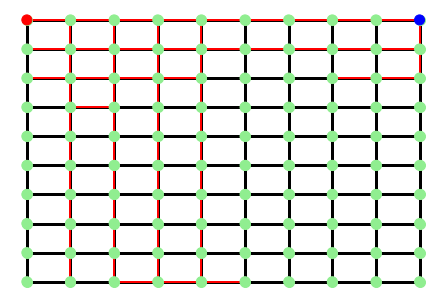

In [266]:
# t steps of random walk
# always same starting point (0,0)
N=10
T=100 #steps
G = nx.grid_2d_graph(N,N, periodic=True)
path=[]
#starting 
start=(0,0) 
initial=start # this will be used in the cycle
#list to all connected vertices
for t in range(0,T-1):
    connected=[]
    #searching all the vertices connected to start
    for w in G:
        if w!=initial:
            if (initial,w) in G.edges():
                connected.append(w) # to add the connected vertices to start
    #Random path
    Random=randrange(0,len(connected)) # random number in 0 and lenght of connected
    path.append((initial,connected[Random])) # I add to my path a random edges connecting inital and connected[random]
    initial=connected[Random]
    
    
#PLOT
color_map=[]
for node in G:
    if node == start:
        color_map.append('red') #INITIAL POINT RED
    elif node == initial: 
        color_map.append('blue') #END POINT BLUE
    else:
        color_map.append('lightgreen')
R = nx.grid_2d_graph(N,N,periodic=True)
R.remove_edges_from(list(R.edges))
R.add_edges_from(path)
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos=pos, 
    node_color='lightgreen', 
    with_labels=False,
    node_size=100,
    width=3)
nx.draw(R, pos=pos, 
    node_color=color_map, 
    with_labels=False,
    node_size=100,
    edge_color='red',
    width=2)

Now we perform a random walk on the 2D Kleinberg model

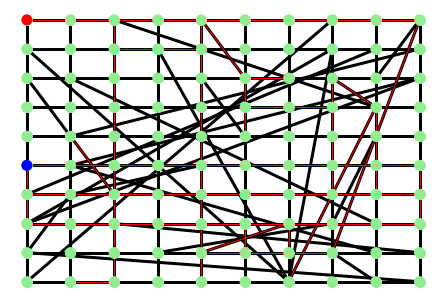

In [273]:
# t steps of random walk
# always same starting point (0,0)
N=10
r=1.5
T=100 #steps
G = Kleinberg_2d(N,r)
path=[]
#starting 
start=(0,0) 
initial=start # this will be used in the cycle
#list to all connected vertices
for t in range(0,T-1):
    connected=[]
    #searching all the vertices connected to start
    for w in G:
        if w!=initial:
            if (initial,w) in G.edges():
                connected.append(w) # to add the connected vertices to start
    #Random path
    Random=randrange(0,len(connected)) # random number in 0 and lenght of connected
    path.append((initial,connected[Random])) # I add to my path a random edges connecting inital and connected[random]
    initial=connected[Random]
    
    
#PLOT
color_map=[]
for node in G:
    if node == start:
        color_map.append('red')
    elif node == initial: 
        color_map.append('blue') 
    else:
        color_map.append('lightgreen')
R = nx.grid_2d_graph(N,N,periodic=True)
R.remove_edges_from(list(R.edges))
R.add_edges_from(path)
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos=pos, 
    node_color='lightgreen', 
    with_labels=False,
    node_size=100,
    width=3)
nx.draw(R, pos=pos, 
    node_color=color_map, 
    with_labels=False,
    node_size=100,
    edge_color='red')

Here we have the same 

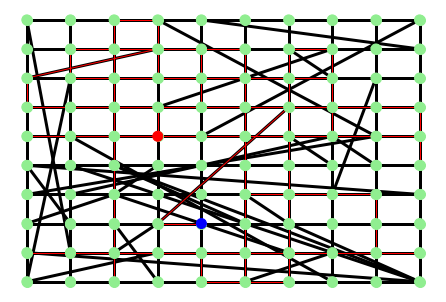

In [274]:
# t steps of random walk
# always same starting point (0,0)
from random import randrange
N=10
r=1.5
T=100 #steps
G = Kleinberg_2d(N,r)
path=[]
#starting at a random point
start=(randrange(0,N-1),randrange(0,N-1)) 
initial=start # this will be used in the cycle
#list to all connected vertices
for t in range(0,T-1):
    connected=[]
    #searching all the vertices connected to start
    for w in G:
        if w!=initial:
            if (initial,w) in G.edges():
                connected.append(w) # to add the connected vertices to start
    #Random path
    Random=randrange(0,len(connected)) # random number in 0 and lenght of connected
    path.append((initial,connected[Random])) # I add to my path a random edges connecting inital and connected[random]
    initial=connected[Random]
    
    
#PLOT
color_map=[]
for node in G:
    if node == start:
        color_map.append('red')
    elif node == initial: 
        color_map.append('blue') 
    else:
        color_map.append('lightgreen')
R = nx.grid_2d_graph(N,N,periodic=True)
R.remove_edges_from(list(R.edges))
R.add_edges_from(path)
pos = {(x,y):(y,-x) for x,y in G.nodes()}
nx.draw(G, pos=pos, 
    node_color='lightgreen', 
    with_labels=False,
    node_size=100,
    width=3)
nx.draw(R, pos=pos, 
    node_color=color_map, 
    with_labels=False,
    node_size=100,
    edge_color='red')